In [9]:
%matplotlib inline

In [10]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.metrics import consensus_score

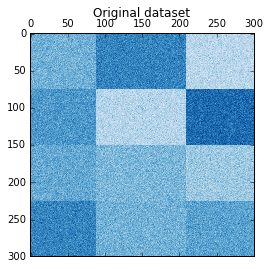

In [11]:
n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

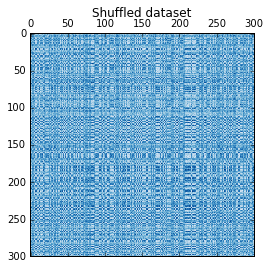

In [12]:
data, row_idx, col_idx = sg._shuffle(data, random_state=0)
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

In [13]:
model = SpectralBiclustering(n_clusters=n_clusters, method='log',
                             random_state=0)
model.fit(data)

In [14]:
score = consensus_score(model.biclusters_,
                        (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.1f}".format(score))

consensus score: 1.0


In [15]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

In [20]:
print model.row_labels_
print model.column_labels_

[0 0 2 0 3 1 3 0 2 1 3 2 0 3 2 2 3 1 3 0 0 1 1 1 0 1 0 3 3 3 1 2 2 1 0 1 0
 0 3 2 0 1 1 2 2 1 3 2 2 2 2 0 0 1 2 3 0 2 3 0 1 1 2 3 3 0 3 1 2 2 0 3 3 2
 1 3 2 1 0 1 1 0 3 0 3 2 0 0 3 3 3 2 3 0 0 0 1 2 0 2 3 3 1 0 2 3 3 0 3 0 0
 0 2 1 3 2 0 3 1 2 2 1 2 2 2 1 0 0 0 2 1 0 2 2 1 0 3 3 2 3 2 1 0 2 0 1 2 2
 1 3 0 2 3 3 3 1 2 2 3 1 0 1 2 0 2 2 2 0 2 3 3 1 0 2 0 0 1 0 3 2 1 1 3 0 1
 1 3 1 0 1 0 0 2 0 1 2 1 3 1 3 3 3 2 2 2 1 3 1 0 2 3 1 1 1 0 1 0 1 3 3 0 2
 2 0 1 0 1 1 3 3 1 3 1 1 3 2 1 1 2 2 0 3 2 2 1 3 0 2 1 1 1 2 3 3 2 1 2 3 1
 2 0 0 0 3 0 2 2 1 0 3 3 1 3 0 1 0 3 1 3 2 2 0 3 0 3 2 0 1 2 1 3 3 0 2 0 3
 0 1 2 0]
[1 1 1 2 2 0 1 0 0 0 1 1 0 1 1 1 1 0 0 2 1 1 1 1 1 0 2 1 2 1 0 1 2 2 2 1 2
 2 1 1 0 0 2 0 1 1 0 1 0 2 2 1 2 2 0 1 1 0 2 0 2 2 0 1 0 0 2 1 0 2 0 2 1 0
 2 2 2 0 0 2 2 2 0 0 0 2 2 1 1 1 1 1 0 1 0 2 1 1 0 2 1 0 1 0 0 0 2 1 1 2 1
 1 0 1 1 2 2 1 2 1 0 0 1 2 0 1 2 0 1 0 0 0 0 0 1 2 1 1 1 2 0 0 1 0 1 1 0 1
 0 2 1 1 1 2 1 0 0 1 1 1 1 2 2 1 2 2 1 2 0 1 0 0 0 1 1 0 2 2 1 0 1 1 2 1 1
 1 1 1 2 1 2 2 

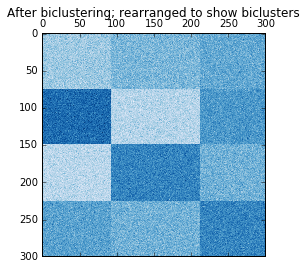

In [16]:
plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")
plt.show()

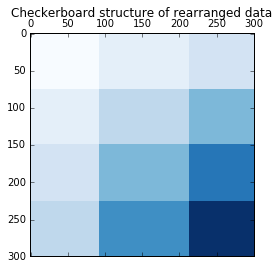

In [18]:
plt.matshow(np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1),
            cmap=plt.cm.Blues)
plt.title("Checkerboard structure of rearranged data")
plt.show()